## Exercise 1

Using regular expressions, extract all names from the dataset `yob2012.txt` (including the number of newborns registered in 2012 with their names and sex), which start with letters A to C. How many names did you find?

In [3]:
import pandas as pd
data = pd.read_csv('yob2012.txt', header=None, names = ['Name', 'Sex','id'])
data.head()

,Name,Sex,id
0,Sophia,F,22267
1,Emma,F,20902
2,Isabella,F,19058
3,Olivia,F,17277
4,Ava,F,15512


In [7]:
data_name = data['Name']
count = 0
condi = ['A','a','B','b','C','c']
num = len(data_name)
for a in range(num):
  for i in data_name[a]:
    if i in condi:
      #print(df_name[a])
      count += 1
      break
    else:
      break
print(count)

7606


### Exercise 2

 1. Write a generator function that generates prime numbers in�nitely.
 2. Write a generator function that generates a sequence of powers of a given base up to a
 given exponent. Then pipelining with generator double function which double the
 sequence from previous generator.

In [8]:
def prime_generator():
    """Generates an infinite sequence of prime numbers."""
    num = 2
    while True:
        is_prime = True
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                is_prime = False
                break
        if is_prime:
            yield num
        num += 1

def power_generator(base, exponent):
    """Generates powers of a base up to a given exponent."""
    for i in range(exponent + 1):
        yield base**i

def double_generator(gen):
  """Doubles the values from the input generator"""
  for val in gen:
    yield val * 2

# Example usage of power_generator and double_generator:
base = 2
exponent = 5

powers = power_generator(base, exponent)
doubled_powers = double_generator(powers)

print("Powers of", base, "up to", exponent, ":")
for power in powers:
    print(power)

print("\nDoubled powers of", base, "up to", exponent, ":")
for doubled_power in doubled_powers:
    print(doubled_power)


# Example usage of prime_generator (limited for demonstration):
prime_gen = prime_generator()
print("\nFirst 10 prime numbers:")
for _ in range(10):
    print(next(prime_gen))

Powers of 2 up to 5 :
1
2
4
8
16
32

Doubled powers of 2 up to 5 :

First 10 prime numbers:
2
3
5
7
11
13
17
19
23
29


### Exercise 3

 Given a data uoe_tweets_07022019, let do the following tasks:
 1. Remove the screen_name and created_at columns.
 2. It would be interesting to see how frequently the university has made posts. Can you
 group all posts according to their date of publication and then create a plot through time
 of how many posts have been made each day.
 You can use the DataFrame.groupby() method to �nd occurrences. Don't forget to
 label the axis of your plot.
 You can transfrom a DataFrame.groupby() object back into a DataFrame by using its
 3. We would like to identify the 10 most favourited posts. This can easily be done using the
 nlargest method and then simply indexing into the original dataframe.
 Find the 10 most popular posts, print them and see what they are about.
 You might want to use the .iloc method to index into the original data

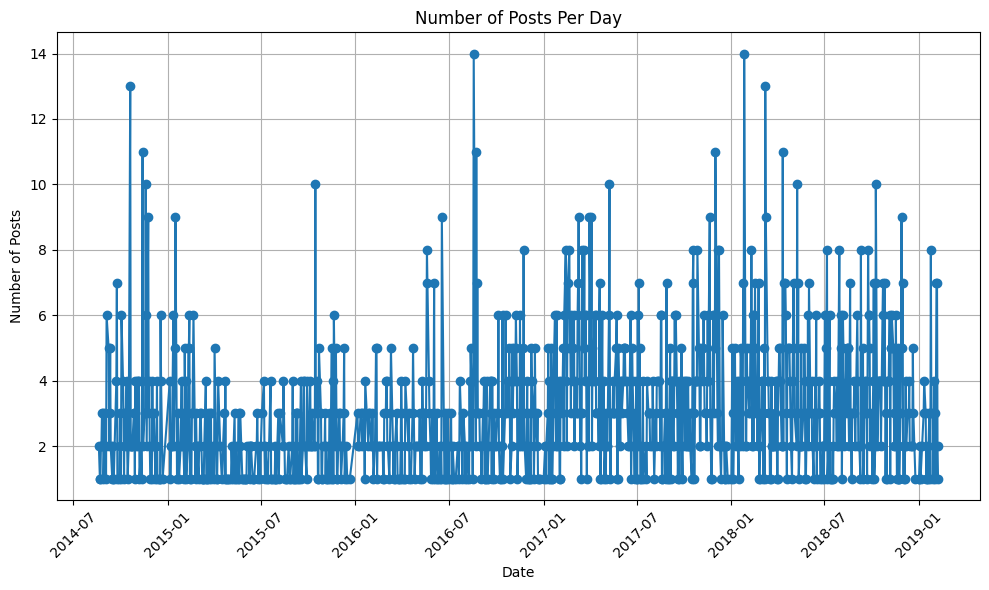

In [16]:
import matplotlib.pyplot as plt

# Load the data (replace 'uoe_tweets_07022019.csv' with your actual file name)
try:
    uoe_tweets = pd.read_csv('uoe_tweets_07022019.csv')
except FileNotFoundError:
    print("Error: 'uoe_tweets_07022019.csv' not found. Please ensure the file exists and the path is correct.")
    exit()

# Step 1: Remove the 'screen_name' and 'created_at' columns
tweets_cleaned = uoe_tweets.drop(columns=['screen_name', 'created_at'])

# Step 2: Analyze posting frequency by date
# Convert 'created_at' to datetime and extract the date
uoe_tweets['created_date'] = pd.to_datetime(uoe_tweets['created_at']).dt.date

# Group by date and count the number of posts per day
posts_per_day = uoe_tweets.groupby('created_date').size()

# Plotting the number of posts per day
plt.figure(figsize=(10, 6))
posts_per_day.plot(kind='line', marker='o')
plt.title('Number of Posts Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Step 3: Identify the 10 most favorited posts
top_10_favorited = uoe_tweets.nlargest(10, 'favorite_count')
top_10_posts = top_10_favorited[['text', 'favorite_count']]
top_10_posts


,text,favorite_count
2625,Tickets now available for public talk by Bolly...,3725
1434,"Congratulations to Canadian PM @JustinTrudeau,...",2553
1320,Scientists have developed a camera that can se...,798
591,We’re ranked in world top 20 in the QS​ World ...,574
1033,We’re number 2 on the @timeshighered list of 1...,522
1688,"""Edinburgh is and will remain a proudly #Europ...",492
1594,Celebrate dance today for the #InternationalDa...,478
2606,"Congratulations Dr Shah Rukh Khan, honorary gr...",474
1034,"Wishing all of our students, staff &amp; frien...",463
965,Bill Gates says some of the world’s best resea...,448
